<a href="https://colab.research.google.com/github/BalavSha/Deep-Learning/blob/main/Recurrent_Neural_Network(RNNs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> **Recurrent Neural Network(RNNs)** </center>

--> ANNs to handle sequential data

You need to develop RNN models that can do the following:


*   Handle variable-length input sequences

*   Track long-term dependencies in the data

*   Maintain information about the sequence's order

*   Share parameters across the entirety of the sequence

### **Training an ANN for Sequential Data - Nvidia Stock prediction**


*   **target variable** -> Price of stock in a given day
*   **features** -> Price of a stock in a previous 60 days

In [1]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1. Import Nvidia Stock Data:

In [2]:
# import dataset
data = pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-TensorFlow-Workshop/master/Chapter09/Datasets/NVDA.csv")

# display first 5 rows of the dataset
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-22,19.650000,19.650000,19.17,19.410000,18.851749,8911800
1,2015-07-23,19.450001,19.940001,19.41,19.650000,19.084845,4247900
2,2015-07-24,19.790001,19.809999,19.34,19.420000,18.861464,4721100
3,2015-07-27,19.250000,19.530001,19.09,19.309999,18.754622,4810500
4,2015-07-28,19.360001,19.860001,19.16,19.730000,19.162542,4957700


2. Split the dataset into training and test sets:

In [3]:
#  use data before "2019-01-01" as training set
data_training = data[data["Date"] < "2019-01-01"].copy()

# use data after "2019-01-01" as testing set
data_test = data[data["Date"] >= "2019-01-01"].copy()

In [4]:
# drop the un-necessary columns after splitting
training_data = data_training.drop(["Date", "Adj Close"], axis=1)
test_data = data_test.drop(["Date", "Adj Close"], axis=1)

# display the changed dataframe
training_data.head()

,Open,High,Low,Close,Volume
0,19.650000,19.650000,19.17,19.410000,8911800
1,19.450001,19.940001,19.41,19.650000,4247900
2,19.790001,19.809999,19.34,19.420000,4721100
3,19.250000,19.530001,19.09,19.309999,4810500
4,19.360001,19.860001,19.16,19.730000,4957700


3. Rescale the training data in a uniform range

In [5]:
# store the column names before rescaling
train_cols = training_data.columns
test_cols = test_data.columns

train_cols

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# initialize the scaler
scaler = MinMaxScaler()

# perform the rescaling
training_data = scaler.fit_transform(training_data)
# training_data = pd.DataFrame(training_data, columns=train_cols)
# training_data.head()

4. Prepare data from traning and testing

In [7]:
# check the shape of training_data
training_data.shape[0]

868

In [8]:
# split your data into X_train and y_train
X_train = []
y_train = []

# Looping through the range of 60 to the number of rows in training_data
for i in range(60, training_data.shape[0]):

    # Appending the values of training_data from i-60 to i to X_train
    X_train.append(training_data[i-60:i])

    # Appending the value of training_data at index i, column 0 to y_train
    y_train.append(training_data[i, 0])

In [9]:
# convert X_train and y_train into NumPy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# display the dimension of X_train, y_train
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

X_train: (808, 60, 5)
y_train: (808,)


--> As shown above, the prepared training set contains 808 observations with 60 days of data for the five features.

##### Transform the data into a 2D matrix with the shape of the sample (the number of samples and the number of features in each sample).<br>
##### Stack the features for all 60 days on top of each other to get an output size of (808, 300)

In [10]:
# save the shape of X_train
X_old_shape = X_train.shape

# reshaping X_train to have X_old_shape[0] rows and X_old_shape[1]*X_old_shape[2] columns
X_train = X_train.reshape(X_old_shape[0], X_old_shape[1]*X_old_shape[2])

# display the reshaped X_train
X_train.shape

(808, 300)

5. Build an ANN model.

In [11]:
# import libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

In [12]:
# initialize the ANN model
regressor_ann = Sequential()

In [13]:
# add an input layer with input_shape as 300
regressor_ann.add(Input(shape = (X_train.shape[1])))

# add dense layer with 512 units as output
regressor_ann.add(Dense(512, activation="relu"))
# add dropout layer to remove 20% of the units during training to prevent overfitting
regressor_ann.add(Dropout(0.2))

# add another dense layer and Dropout layer
regressor_ann.add(Dense(128, activation="relu"))
# add another Dropout layer
regressor_ann.add(Dropout(0.3))

# add another dense and dropout layer
regressor_ann.add(Dense(64, activation="relu"))
regressor_ann.add(Dropout(0.4))

# add another dense and dropout layer
regressor_ann.add(Dense(16, activation="relu"))
regressor_ann.add(Dropout(0.5))

# add final dense layer as output
regressor_ann.add(Dense(1))

In [14]:
# display of the model architecture
regressor_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               154112    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                1

6. Compile the model with optimizer, loss function and accuracy metrics.

In [15]:
# compile the model for training
regressor_ann.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics="mse"
                    )

7. Train the ANN model

In [16]:
# fit the ANN model to the training data
regressor_ann.fit(X_train,
                  y_train,
                  epochs=20,
                  batch_size=32
                  )

Epoch 1/20
26/26 [==============================] - 6s 4ms/step - loss: 0.1787 - mse: 0.1787
Epoch 2/20
26/26 [==============================] - 0s 3ms/step - loss: 0.1074 - mse: 0.1074
Epoch 3/20
26/26 [==============================] - 0s 3ms/step - loss: 0.0804 - mse: 0.0804
Epoch 4/20
26/26 [==============================] - 0s 4ms/step - loss: 0.0725 - mse: 0.0725
Epoch 5/20
26/26 [==============================] - 0s 3ms/step - loss: 0.0674 - mse: 0.0674
Epoch 6/20
26/26 [==============================] - 0s 3ms/step - loss: 0.0715 - mse: 0.0715
Epoch 7/20
26/26 [==============================] - 0s 4ms/step - loss: 0.0544 - mse: 0.0544
Epoch 8/20
26/26 [==============================] - 0s 3ms/step - loss: 0.0497 - mse: 0.0497
Epoch 9/20
26/26 [==============================] - 0s 3ms/step - loss: 0.0512 - mse: 0.0512
Epoch 10/20
26/26 [==============================] - 0s 5ms/step - loss: 0.0541 - mse: 0.0541
Epoch 11/20
26/26 [==============================] - 0s 5ms/step - lo

# <center><b>Recurrent Neural Networks(RNN)</b></center>

**Building an RNN model with an LSTM layer for Nvidia Stock Prediction:**

In [17]:
# Importing the necessary modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [18]:
# Creating a Sequential model
regressor = Sequential()

# Adding a LSTM layer with 50 units, 'relu' activation function,
# return_sequences set to True and an input shape of (X_train.shape[1], 5)
# This layer will take in the input data and process it using LSTM units
regressor.add(LSTM(units=50, activation='relu', return_sequences=True,
                   input_shape=(X_train.shape[1], 5)))

# Adding a Dropout layer with a rate of 0.2
# This layer will randomly drop out 20% of the units in the previous layer
# to prevent overfitting
regressor.add(Dropout(0.2))

# Adding another LSTM layer with 60 units and 'relu' activation function
# This layer will take in the output from the previous LSTM layer and process it further
regressor.add(LSTM(units=60, activation='relu', return_sequences=True))

# Adding another Dropout layer with a rate of 0.3
# This layer will randomly drop out 30% of the units in the previous layer
# to prevent overfitting
regressor.add(Dropout(0.3))

# Adding another LSTM layer with 80 units and 'relu' activation function
# This layer will take in the output from the previous LSTM layer and process it further
regressor.add(LSTM(units=80, activation='relu', return_sequences=True))

# Adding another Dropout layer with a rate of 0.4
# This layer will randomly drop out 40% of the units in the previous layer
# to prevent overfitting
regressor.add(Dropout(0.4))

# Adding another LSTM layer with 120 units and 'relu' activation function
# This layer will take in the output from the previous LSTM layer and process it further
regressor.add(LSTM(units=120, activation='relu'))

# Adding another Dropout layer with a rate of 0.5
# This layer will randomly drop out 50% of the units in the previous layer
# to prevent overfitting
regressor.add(Dropout(0.5))

# Adding a Dense layer with 1 unit
# This is the output layer that will produce the final prediction
regressor.add(Dense(units=1))

In [19]:
# view the summary of the model architecture
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 300, 50)           11200     
                                                                 
 dropout_4 (Dropout)         (None, 300, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 300, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 300, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 300, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 300, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

------

------

### Build an RNN model with Multiple LSTM Layers to Predict Power Consumption:

**Import libraries**

In [1]:
import numpy as np
import pandas as pd
import datetime

# library for performing rescaling
from sklearn.preprocessing import MinMaxScaler

**Load the Dataset**

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-TensorFlow-Workshop/master/Chapter09/Datasets/household_power_consumption.csv")
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/1/2007,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1/1/2007,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,1/1/2007,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,1/1/2007,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,1/1/2007,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0


**Create a new column Datetime by combining Date & Time columns**

In [3]:
# convert the column into datetime object with specified format
data["Date"] = pd.to_datetime(data["Date"], format="%d/%m/%Y")

# create new "Datetime" column by combing "Date" and "Time" columns
data["Datetime"] = data["Date"].dt.strftime("%Y-%m-%d") + " " + data["Time"]

# convert the "Datetime" column to datetime object
data["Datetime"] = pd.to_datetime(data["Datetime"])

data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,2007-01-01,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0,2007-01-01 00:00:00
1,2007-01-01,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0,2007-01-01 00:01:00
2,2007-01-01,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0,2007-01-01 00:02:00
3,2007-01-01,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0,2007-01-01 00:03:00
4,2007-01-01,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0,2007-01-01 00:04:00


In [4]:
# sort the dataframe in ascending order using the "Datetime" column
data = data.sort_values(["Datetime"])
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,2007-01-01,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0,2007-01-01 00:00:00
1,2007-01-01,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0,2007-01-01 00:01:00
2,2007-01-01,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0,2007-01-01 00:02:00
3,2007-01-01,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0,2007-01-01 00:03:00
4,2007-01-01,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0,2007-01-01 00:04:00


In [5]:
# create list to store numeric columns
num_cols = ["Global_active_power", "Global_reactive_power", "Voltage", 
            "Global_intensity","Sub_metering_2", "Sub_metering_3"]

# convert them into numeric datatype
for col in num_cols:
  # if there is any errors during the conversion, they will be set to NaN
  data[col] = pd.to_numeric(data[col], errors="coerce")

# first few rows
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,2007-01-01,0:00:00,2.580,0.136,241.97,10.6,0,0.0,0.0,2007-01-01 00:00:00
1,2007-01-01,0:01:00,2.552,0.100,241.75,10.4,0,0.0,0.0,2007-01-01 00:01:00
2,2007-01-01,0:02:00,2.550,0.100,241.64,10.4,0,0.0,0.0,2007-01-01 00:02:00
3,2007-01-01,0:03:00,2.550,0.100,241.71,10.4,0,0.0,0.0,2007-01-01 00:03:00
4,2007-01-01,0:04:00,2.554,0.100,241.98,10.4,0,0.0,0.0,2007-01-01 00:04:00


In [6]:
# Count missing values in each numeric columns
for col in num_cols:
  missing = data[col].isna().sum()
  print(f"{col} missing values --> {missing}")

Global_active_power missing values --> 3771
Global_reactive_power missing values --> 3771
Voltage missing values --> 3771
Global_intensity missing values --> 3771
Sub_metering_2 missing values --> 3771
Sub_metering_3 missing values --> 3771


In [7]:
# fill the missing values in those numeric columns with average
for col in num_cols:
  data[col].fillna(data[col].mean(), inplace=True)

In [8]:
# check if there is any more missing values
for col in num_cols:
  missing = data[col].isna().sum()
  print(f"{col} missing values --> {missing}")

Global_active_power missing values --> 0
Global_reactive_power missing values --> 0
Voltage missing values --> 0
Global_intensity missing values --> 0
Sub_metering_2 missing values --> 0
Sub_metering_3 missing values --> 0


**Drop no longer unnecessay columns from the dataframe:**

In [9]:
# drop the "Date", "Time", "Global_reactive_power", and "Datetime"
df = data.drop(["Date", "Time", "Global_reactive_power", "Datetime"], axis=1)

df.head()

,Global_active_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2.580,241.97,10.6,0,0.0,0.0
1,2.552,241.75,10.4,0,0.0,0.0
2,2.550,241.64,10.4,0,0.0,0.0
3,2.550,241.71,10.4,0,0.0,0.0
4,2.554,241.98,10.4,0,0.0,0.0


**Perfrom feature scaling to the dataframe:**

In [10]:
# initialize the scaler
scaler = MinMaxScaler()

# rescale the feature values
df = df.replace("?", np.nan)
scaled_data = scaler.fit_transform(df)
scaled_data

array([[0.23592747, 0.67445255, 0.22173913, 0.        , 0.        ,
        0.        ],
       [0.23328296, 0.66642336, 0.2173913 , 0.        , 0.        ,
        0.        ],
       [0.23309407, 0.66240876, 0.2173913 , 0.        , 0.        ,
        0.        ],
       ...,
       [0.26445032, 0.56788321, 0.25217391, 0.        , 0.        ,
        0.9       ],
       [0.24348319, 0.56532847, 0.23478261, 0.        , 0.        ,
        0.9       ],
       [0.23290518, 0.57518248, 0.22173913, 0.        , 0.01282051,
        0.85      ]])

**Prepare training and testing dataset:**

In [11]:
# to store features and target variables
X = []
y = []

# create a training dataset that has previous 60 minutes' power consumption
# so that you can predict the value for the next minute
for i in range(60, scaled_data.shape[0]):
  X.append(scaled_data[i-60:i])
  y.append(scaled_data[i, 0])

In [12]:
# convert the X and y into NumPy arrays in preparation for traning the model
X, y = np.array(X), np.array(y)

In [13]:
# split the dataset into traning and testing sets with data before and after the index 217440
X_train = X[:217440]
y_train = y[:217440]

X_test = X[217440:]
y_test = y[217440:]

**Building the RNN model**

In [14]:
# required libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

Build the RNN model architecture

In [15]:
# create a Sequential model
regressor = Sequential()

In [16]:
# add a LSTM layer with 20units and "relu" activation function
regressor.add(LSTM(units=20, activation="relu", return_sequences=True, 
                   input_shape=(X_train.shape[1], X_train.shape[2])))
# add dropout layer with 50% to prevent overfitting
regressor.add(Dropout(0.5))

# add another LSTM layer with 40 units and "relu" activation function
regressor.add(LSTM(units=40, activation="relu", return_sequences=True))
# add another dropout layer with a rate of 50% to prevent overfitting
regressor.add(Dropout(0.5))

# add another LSTM layer with 80 units and "relu" activation function
# return_sequences = True, not required in final LSTM layer
regressor.add(LSTM(units=80, activation="relu"))
# add another Dropout layer with a rate of 50% to prevent overfitting
regressor.add(Dropout(0.5))

# add a Dense output layer with 1 unit
regressor.add(Dense(units=1))

In [17]:
# summary of the RNN model architecture
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 20)            2160      
                                                                 
 dropout (Dropout)           (None, 60, 20)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 40)            9760      
                                                                 
 dropout_1 (Dropout)         (None, 60, 40)            0         
                                                                 
 lstm_2 (LSTM)               (None, 80)                38720     
                                                                 
 dropout_2 (Dropout)         (None, 80)                0         
                                                                 
 dense (Dense)               (None, 1)                 8

**Compile the RNN model with Adam optimizer and MSE loss function**

In [18]:
regressor.compile(
    optimizer = "Adam",
    loss = "mean_squared_error"
)

**Fit the RNN model to the training dataset**

In [ ]:
regressor.fit(
    X_train, y_train,
    epochs=2,
    batch_size=32
)

Epoch 1/2
4169/6795 [=================>............] - ETA: 6:41 - loss: nan

**Make a Prediction using the trained RNN model**

In [59]:
y_pred = regressor.predict(X_test)
y_pred

1349/1349 [==============================] - 54s 40ms/step


array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

**Compare the real household power consumption and model's predictions for the last hour of data from test set**

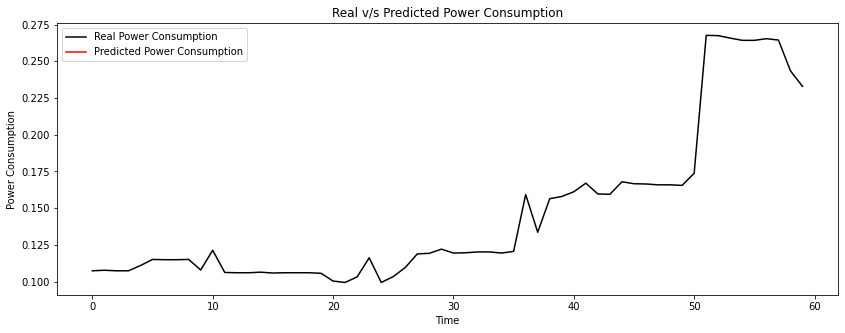

In [60]:
import matplotlib.pyplot as plt

# set the figure size
plt.figure(figsize=(14, 5))

# plot the last 60 values of the true power consumption
plt.plot(y_test[-60:], color="black", label="Real Power Consumption")

# plot the last 60 values of the predicted power consumption
plt.plot(y_pred[-60:], color="red", label="Predicted Power Consumption")

# set the title of the plot
plt.title("Real v/s Predicted Power Consumption")

# set the x-axis and y-axis
plt.xlabel("Time")
plt.ylabel("Power Consumption")

# add a legend to the plot
plt.legend()

# display the plot
plt.show()

# <center>**Natural Language Processing(NLP)**</center>

**--> Applying RNNs to Text**